 <h1><center>Iris Flower Classification</center></h1>

### Problem Statement

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. 
Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

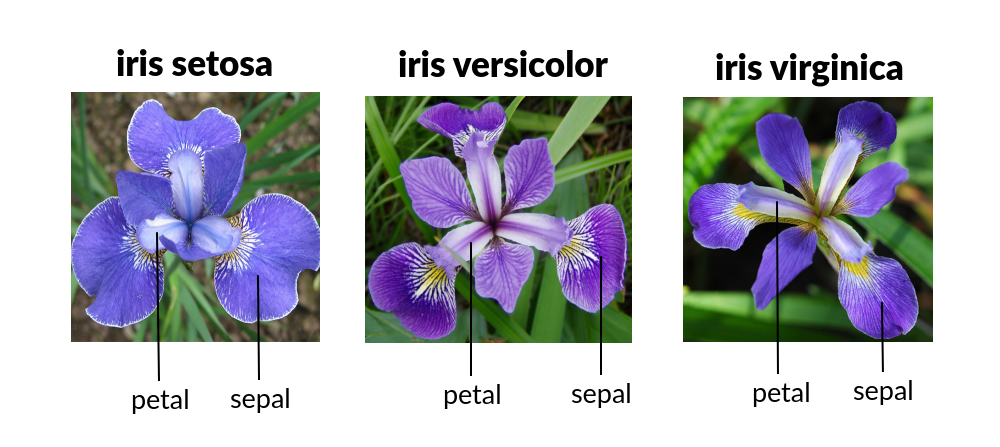

### Dataset

Dataset Link:(https://www.kaggle.com/datasets/saurabh00007/iriscsv)

### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

## **Data Cleaning and Processing**

In [4]:
# Loading the Dataset from csv file.
df = pd.read_csv("Iris.csv")

In [5]:
# Displaying the data from the Dataset.
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Displaying First 5 rows of the Dataset.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Displaying last 5 rows of the Dataset.
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#Displaying total count of data points in the DataFrame(No. of Columns * No. of rows).
df.size

900

In [9]:
# Displaying No. of rows, No. of Columns.
df.shape

(150, 6)

In [10]:
#Getting some information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **Data Cleaning**

In [12]:
# Dropping of Id column
df = df.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# checking for missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
# Checking for Duplicate Values
Duplicates = df.duplicated().sum()
print("Total Number of Duplicate records :",Duplicates)

Total Number of Duplicate records : 3


In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## **Data Visualization**

### 1. Pair Plot with Species

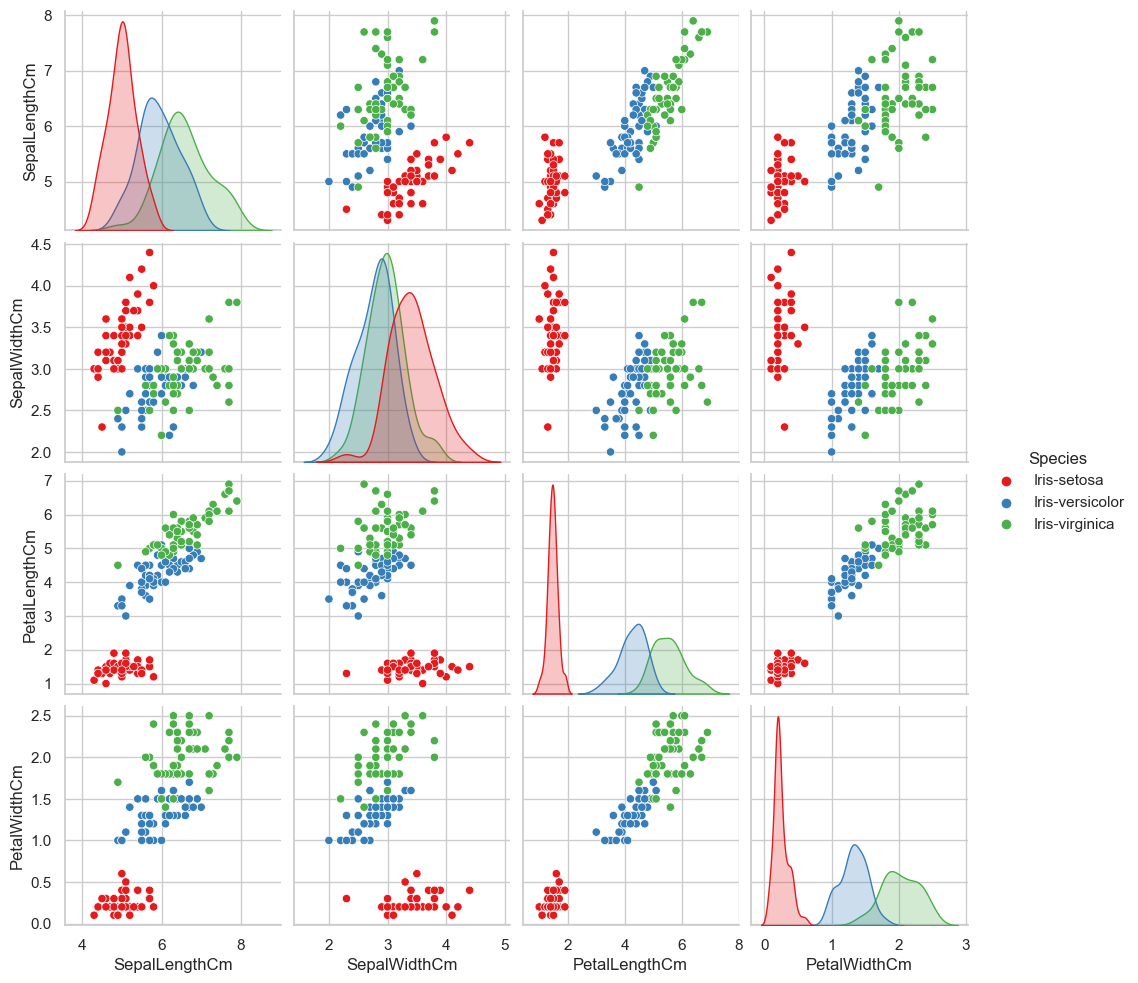

In [16]:
sns.pairplot(df, hue='Species', palette='Set1')
plt.show()

### 2. Pie chart for Species Count

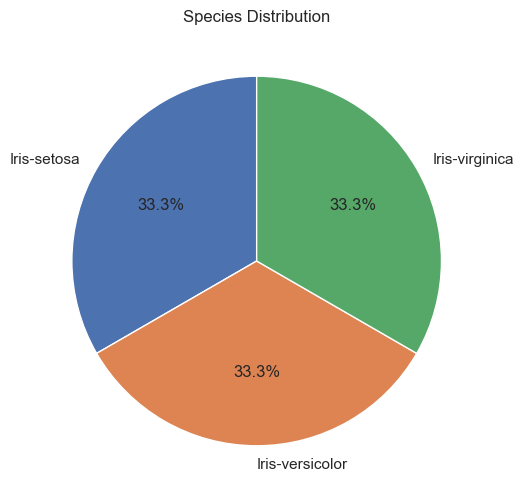

In [164]:
plt.figure(figsize=(8, 6))

species_counts = df['Species'].value_counts()

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')

plt.show()

### 3. Box Plot for Each Feature:

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

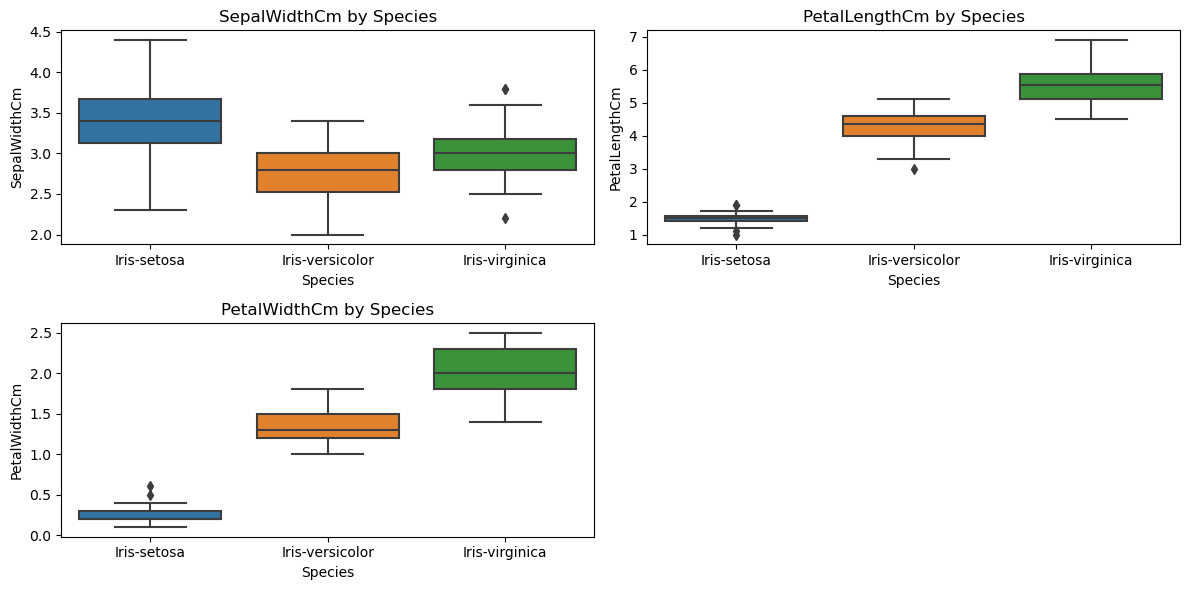

In [25]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

### 4. Correlation Heatmap:

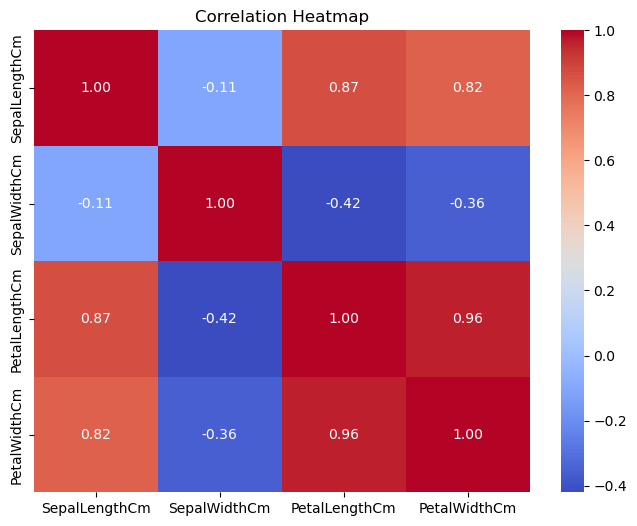

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 5. Violin Plot for Each Feature:

<Figure size 1200x600 with 0 Axes>

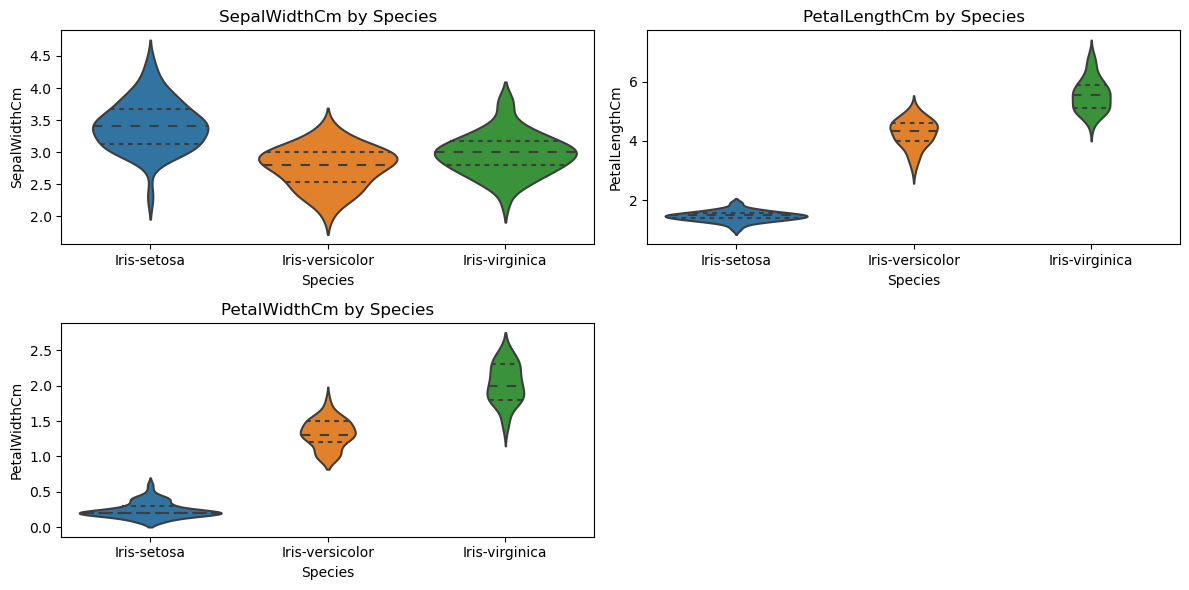

In [29]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Species', y=feature, data=df, inner='quart')
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

### Split the data into training and testing sets

In [57]:
from sklearn.model_selection import train_test_split
x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

In [58]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

### Logistic Regression Model

In [129]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [128]:
# Make predictions on the test data
predict = logreg.predict(x_test)

In [127]:
# Calculate accuracy in percentage for Logistic Regression
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 97.77777777777777


### Confusion Matrix

In [135]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_mat = confusion_matrix(y_test, predict)
class_report = classification_report(y_test, predict)
print("Classification report:\n", class_report)

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



### Support Vector Machine (SVM) Algorithm

In [161]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_1 = SVC()
model_1.fit(x_train,y_train)
SVC_prediction = model_1.predict(x_test)
print("Accuracy:",accuracy_score(y_test,SVC_prediction)*100)

Accuracy: 97.77777777777777


### K-Nearest Neighbours 

In [157]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(x_train,y_train)
KNeighborsClassifier_prediction = model_2.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,KNeighborsClassifier_prediction)*100)

Accuracy Score: 97.77777777777777


### GaussianNB

In [149]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(x_train,y_train)
GaussianNB_prediction = model_3.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,GaussianNB_prediction)*100)

Accuracy Score: 97.77777777777777


### Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_predictions = decision_tree.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,decision_tree_predictions)*100)

Accuracy Score: 95.55555555555556


In [163]:
accuracy_scores = {
    "Logistic Regression": 97.77,
    "Confusion Matrix": 97.77,
    "Support Vector": 97.77,
    "KNN Neighbors": 97.77,
    "GaussianNB": 97.77,
    "Decision Tree Classifier": 95.55
}

accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=["Algorithm", "Accuracy (%)"])

summary = "All algorithms achieved high accuracy scores, with Logistic Regression, Confusion Matrix, Support Vector, KNN Neighbors, and GaussianNB all performing exceptionally well at 97.77%. Decision Tree Classifier slightly lagged behind with an accuracy of 95.55%."

print("Accuracy Scores:")
print(accuracy_df)
print("\nSummary:")
print(summary)

Accuracy Scores:
                  Algorithm  Accuracy (%)
0       Logistic Regression         97.77
1          Confusion Matrix         97.77
2            Support Vector         97.77
3             KNN Neighbors         97.77
4                GaussianNB         97.77
5  Decision Tree Classifier         95.55

Summary:
All algorithms achieved high accuracy scores, with Logistic Regression, Confusion Matrix, Support Vector, KNN Neighbors, and GaussianNB all performing exceptionally well at 97.77%. Decision Tree Classifier slightly lagged behind with an accuracy of 95.55%.
